In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**1. Policy Iteration**

Sweeps: 10
Valores estimados:
[0.         0.00206562 0.00516406 0.00922547 0.01291015 0.0173854
 0.02306368 0.02781411 0.03227539 0.03768507 0.0434635  0.05035447
 0.05765919 0.06523937 0.06953528 0.07443124 0.08068847 0.08661104
 0.09421268 0.10314362 0.10865874 0.11596663 0.12588617 0.13357998
 0.14414799 0.16       0.16309844 0.16774609 0.17383821 0.17936523
 0.1860781  0.19459552 0.20172117 0.20841308 0.21652761 0.22519525
 0.2355317  0.24648879 0.25785906 0.26430292 0.27164686 0.2810327
 0.28991657 0.30131902 0.31471544 0.32298812 0.33394994 0.34882926
 0.36036996 0.37622198 0.4        0.40309844 0.40774609 0.41383821
 0.41936523 0.4260781  0.43459552 0.44172117 0.44841308 0.45652761
 0.46519525 0.4755317  0.48648879 0.49785906 0.50430292 0.51164686
 0.5210327  0.52991657 0.54131902 0.55471544 0.56298812 0.57394994
 0.58882926 0.60036996 0.61622198 0.64       0.64464766 0.65161914
 0.66075731 0.66904785 0.67911715 0.69189327 0.70258175 0.71261962
 0.72479141 0.73779287 0.75329756 

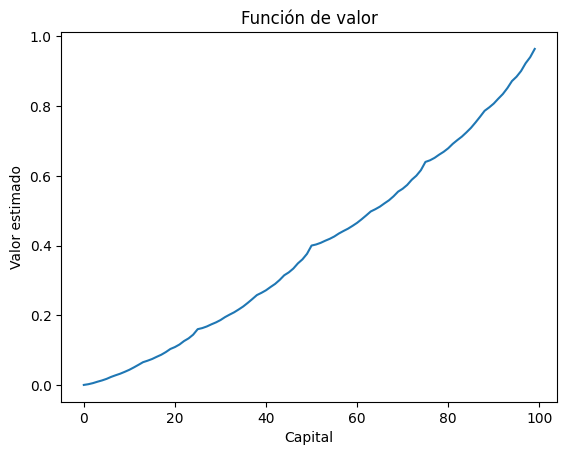

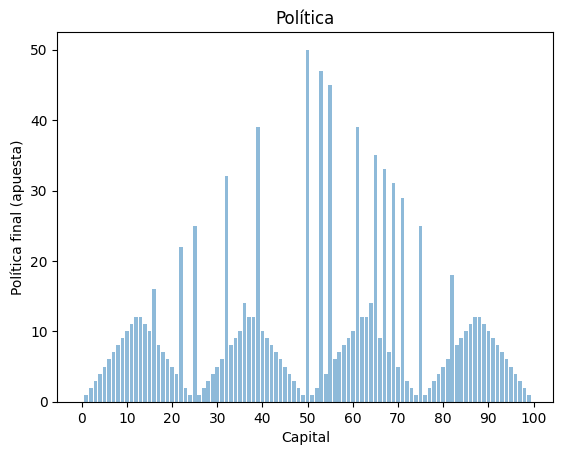

In [ ]:
# Parámetros
p_h = 0.4 # Probabilidad de que la moneda caiga en "head"
gamma = 1 # Tasa de descuento (=1 porque este problema trata tareas episódicas)
recompensas = np.zeros(101) # Desde el estado con $0 hasta $100
recompensas[100] = 1 # Consideramos que la recompensa es +1 sólo cuando se llega al objetivo de los $100

class PolicyIteration:

    def __init__(self):
        self.valor_estado = np.zeros(101) # Estados 1 a 100
        self.politica = np.zeros(100) # pi(s): Guarda las acciones posibles para s = 1, ..., 99
        self.theta = 1e-10 # Determina la precisión de la estimación

    def ecuacion_bellman(self, estado, accion, valor_estado):
        estado_ganancia = estado + accion # Accion: cantidad que apuesta y estado_ganancia es el estado al que avanza (capital)
        estado_perdida = estado - accion

        valor_ganancia = p_h * (recompensas[estado_ganancia] + gamma * valor_estado[estado_ganancia])
        valor_perdida = (1 - p_h) * (recompensas[estado_perdida] + gamma * valor_estado[estado_perdida])

        return valor_ganancia + valor_perdida

    def policy_evaluation(self):
        while True:
            delta = 0 # Umbral
            for estado in range(1, 100): # Se itera sobre los estados no terminales
                v = self.valor_estado[estado]
                self.valor_estado[estado] =  self.ecuacion_bellman(estado, int(self.politica[estado]), self.valor_estado)
                delta = max(delta, abs(v - self.valor_estado[estado]))
            if delta < self.theta:
                break

    def policy_improvement(self):
        politica_estable = True
        for estado in range(1, 100):
            accion_pasada = self.politica[estado]
            accion_maxima = min(estado, 100 - estado)  # Límite de la apuesta basado en el capital disponible y necesario
            valores_acciones = np.zeros(accion_maxima + 1)  # Inicialización de los valores de acción
            for accion in range(1, accion_maxima + 1):
                valores_acciones[accion] = self.ecuacion_bellman(estado, accion, self.valor_estado)
            self.politica[estado] = np.argmax(valores_acciones)  # Actualizar la política con la mejor acción
            if accion_pasada != self.politica[estado]:
                politica_estable = False
        return politica_estable

    def iterate_policy(self):
        contador_sweeps = 0
        while True:
            self.policy_evaluation()
            contador_sweeps += 1
            if self.policy_improvement():
                break

        return self.valor_estado, self.politica, contador_sweeps

# Crear una instancia de PolicyIteration y encontrar la política óptima
estimador_pi = PolicyIteration()
valores, politica, contador_sweeps = estimador_pi.iterate_policy()

# Imprimir cantidad de sweeps
print(f"Sweeps: {contador_sweeps}")

# Imprimir valores y política
print("Valores estimados:")
print(valores)
print("Política final (apuesta):")
print(politica)

# Gráfica
# Graficar la función de valor
plt.plot(range(100), valores[:100])
plt.xlabel('Capital')
plt.ylabel('Valor estimado')
plt.title('Función de valor')
plt.show()

# Graficar la política final
plt.bar(range(100), politica, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Política final (apuesta)')
plt.title('Política')
plt.xticks(np.arange(0, 101, step=10))
plt.show()

Sweeps y política intermedia

**2. Value Iteration**

Valores estimados:
[0.         0.00206562 0.00516406 0.00922547 0.01291015 0.0173854
 0.02306368 0.02781411 0.03227539 0.03768507 0.0434635  0.05035447
 0.05765919 0.06523937 0.06953528 0.07443124 0.08068847 0.08661104
 0.09421268 0.10314362 0.10865874 0.11596663 0.12588617 0.13357998
 0.14414799 0.16       0.16309844 0.16774609 0.17383821 0.17936523
 0.1860781  0.19459552 0.20172117 0.20841308 0.21652761 0.22519525
 0.2355317  0.24648879 0.25785906 0.26430292 0.27164686 0.2810327
 0.28991657 0.30131902 0.31471544 0.32298812 0.33394994 0.34882926
 0.36036996 0.37622198 0.4        0.40309844 0.40774609 0.41383821
 0.41936523 0.4260781  0.43459552 0.44172117 0.44841308 0.45652761
 0.46519525 0.4755317  0.48648879 0.49785906 0.50430292 0.51164686
 0.5210327  0.52991657 0.54131902 0.55471544 0.56298812 0.57394994
 0.58882926 0.60036996 0.61622198 0.64       0.64464766 0.65161914
 0.66075731 0.66904785 0.67911715 0.69189327 0.70258175 0.71261962
 0.72479141 0.73779287 0.75329756 0.76973319 

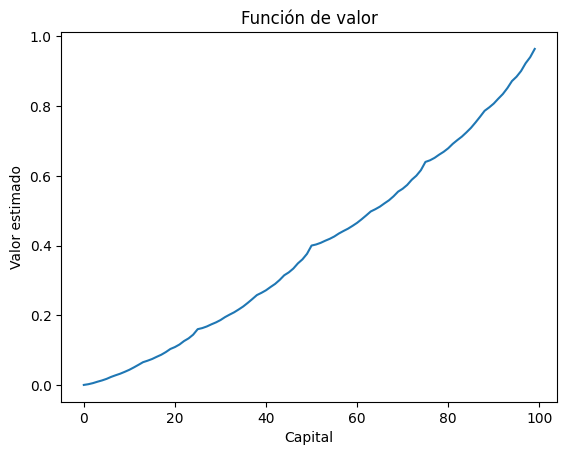

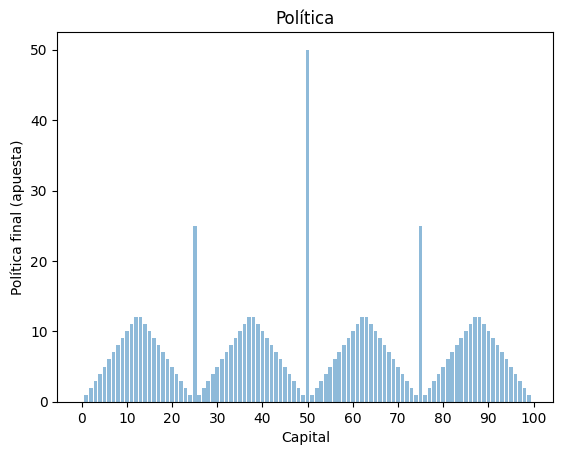

In [ ]:
# Parámetros
# NOTA: Es importante usar "longdouble" para tener mayor precisión y así lograr la gráfica del libro. De otra manera, no se logra.
p_h = 0.4  # Probabilidad de que la moneda caiga en "cara"
gamma = 1  # Tasa de descuento (=1) porque este problema trata tareas episódicas)
recompensas = np.zeros(101)  # recompensas para cada estado incluyendo el 100
recompensas[100] = 1  # recompensa en el estado objetivo

class ValueIteration:
    def __init__(self):
        self.valor_estado = np.zeros(101, dtype=np.longdouble)  # valores de estado
        self.politica = np.zeros(100, dtype=np.longdouble)  # política para cada estado
        self.theta = 1e-50

    def ecuacion_bellman(self, estado, accion, valor_estado):
        estado_ganancia = estado + accion
        estado_perdida = estado - accion
        valor_ganancia = p_h * (recompensas[estado_ganancia] + gamma * valor_estado[estado_ganancia])
        valor_perdida = (1 - p_h) * (recompensas[estado_perdida] + gamma * valor_estado[estado_perdida])
        return valor_ganancia + valor_perdida

    def iteracion_valor(self):
        while True:
            delta = 0
            for estado in range(1, 100):
                v = self.valor_estado[estado]
                max_accion = min(estado, 100 - estado)
                valores_accion = np.zeros(max_accion + 1, dtype=np.longdouble)
                for accion in range(1, max_accion + 1):
                    valores_accion[accion] = self.ecuacion_bellman(estado, accion, self.valor_estado)
                self.valor_estado[estado] = np.max(valores_accion)
                delta = max(delta, np.abs(v - self.valor_estado[estado]))
            if delta < self.theta:
                break
        return self.valor_estado

    def determinar_politica(self):
        for estado in range(1, 100):
            max_accion = min(estado, 100 - estado)
            valores_accion = np.zeros(max_accion + 1)
            for accion in range(1, max_accion + 1):
                valores_accion[accion] = self.ecuacion_bellman(estado, accion, self.valor_estado)
            mejor_accion = np.argmax(valores_accion)
            self.politica[estado] = mejor_accion
        return self.politica

# Crear una instancia de IteracionValor y ejecutar la iteración de valor
estimador_vi = ValueIteration()
valores = estimador_vi.iteracion_valor()  # Actualiza la función de valor hasta que converge
politica = estimador_vi.determinar_politica()  # Calcula la política basada en la función de valor final

# Imprimir valores y política
print("Valores estimados:")
print(valores)
print("Política final (apuesta):")
print(politica)

# Graficar la función de valor
plt.plot(range(100), valores[:100])
plt.xlabel('Capital')
plt.ylabel('Valor estimado')
plt.title('Función de valor')
plt.show()

# Graficar la política final
plt.bar(range(100), politica, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Política final (apuesta)')
plt.title('Política')
plt.xticks(np.arange(0, 101, step=10))
plt.show()

Policy Iteration con TODAS las gráficas

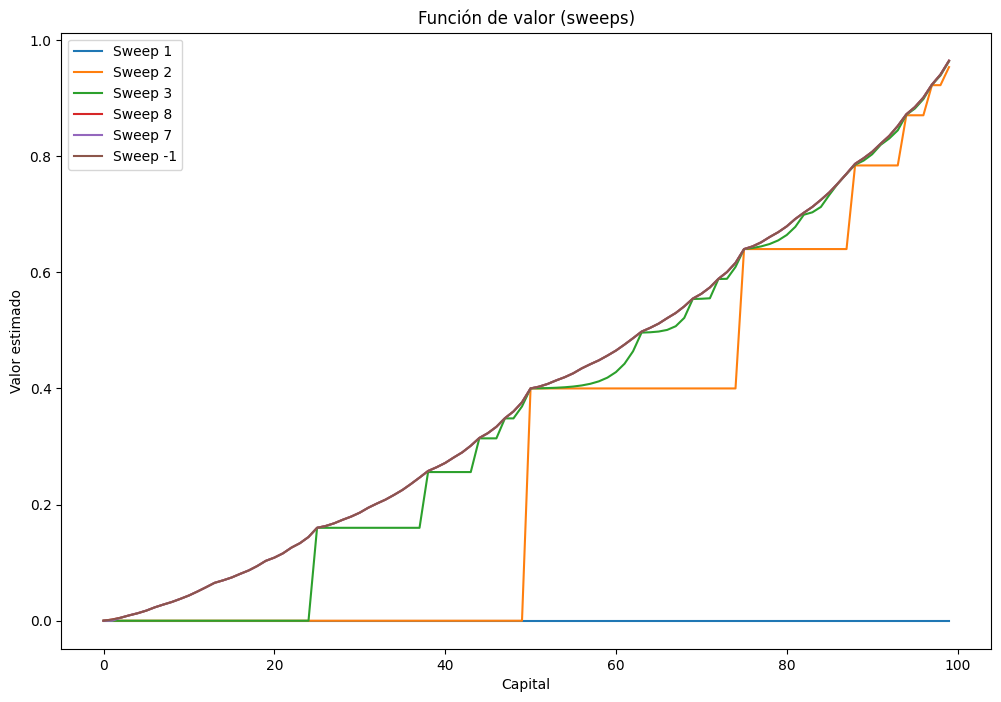

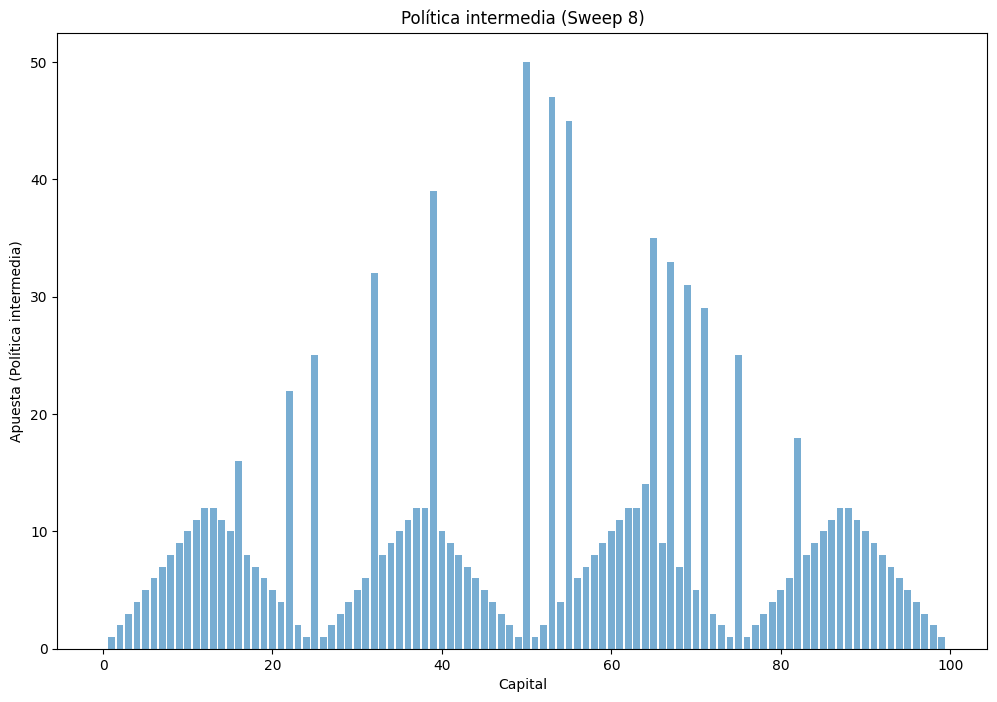

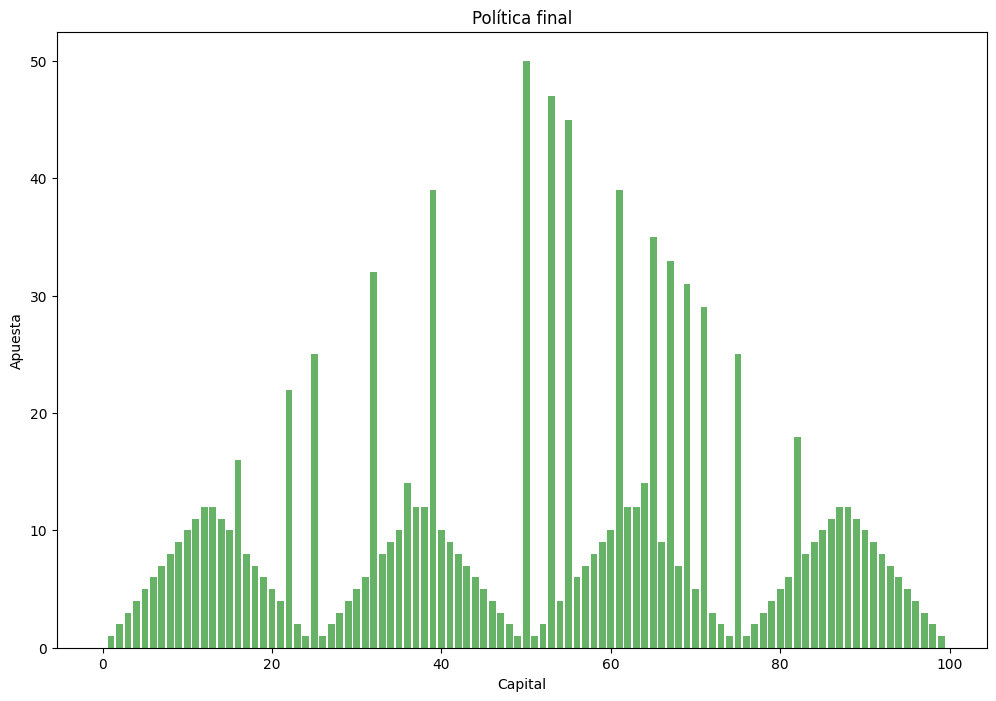

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parámetros
p_h = 0.4  # Probabilidad de que la moneda caiga en "head"
gamma = 1  # Tasa de descuento (=1 porque este problema trata tareas episódicas)
recompensas = np.zeros(101)  # Desde el estado con $0 hasta $100
recompensas[100] = 1  # Consideramos que la recompensa es +1 sólo cuando se llega al objetivo de los $100

class PolicyIteration:
    def __init__(self):
        self.valor_estado = np.zeros(101)  # Estados 1 a 100
        self.politica = np.zeros(100)  # pi(s): Guarda las acciones posibles para s = 1, ..., 99
        self.theta = 1e-10  # Determina la precisión de la estimación
        self.valor_estados_sweeps = []  # Almacena los valores de estado después de cada barrido importante
        self.politicas_sweeps = []  # Almacena las políticas después de cada barrido

    def ecuacion_bellman(self, estado, accion, valor_estado):
        estado_ganancia = estado + accion
        estado_perdida = estado - accion
        valor_ganancia = p_h * (recompensas[estado_ganancia] + gamma * valor_estado[estado_ganancia])
        valor_perdida = (1 - p_h) * (recompensas[estado_perdida] + gamma * valor_estado[estado_perdida])
        return valor_ganancia + valor_perdida

    def policy_evaluation(self):
        while True:
            delta = 0
            for estado in range(1, 100):
                v = self.valor_estado[estado]
                self.valor_estado[estado] = self.ecuacion_bellman(estado, int(self.politica[estado]), self.valor_estado)
                delta = max(delta, abs(v - self.valor_estado[estado]))
            if delta < self.theta:
                break

    def policy_improvement(self):
        politica_estable = True
        for estado in range(1, 100):
            accion_pasada = self.politica[estado]
            accion_maxima = min(estado, 100 - estado)
            valores_acciones = np.zeros(accion_maxima + 1)
            for accion in range(1, accion_maxima + 1):
                valores_acciones[accion] = self.ecuacion_bellman(estado, accion, self.valor_estado)
            self.politica[estado] = np.argmax(valores_acciones)
            if accion_pasada != self.politica[estado]:
                politica_estable = False
        self.politicas_sweeps.append(self.politica.copy())
        return politica_estable

    def iterate_policy(self):
        while True:
            self.policy_evaluation()
            self.valor_estados_sweeps.append(self.valor_estado.copy())
            if self.policy_improvement():
                break

# Crear una instancia de PolicyIteration y ejecutar la iteración de política
policy_iter = PolicyIteration()
policy_iter.iterate_policy()

# Gráficas de la función de valor a lo largo de los sweeps seleccionados
plt.figure(figsize=(12, 8))
for sweep_num in [1, 2, 3, *random.sample(range(4, len(policy_iter.valor_estados_sweeps)), 2), -1]:
    plt.plot(policy_iter.valor_estados_sweeps[sweep_num - 1][:100], label=f'Sweep {sweep_num}')
plt.xlabel('Capital')
plt.ylabel('Valor estimado')
plt.title('Función de valor (sweeps)')
plt.legend()
plt.show()

# Gráfica de la política intermedia
plt.figure(figsize=(12, 8))
intermediate_policy_index = random.randint(0, len(policy_iter.politicas_sweeps) - 2)
plt.bar(range(100), policy_iter.politicas_sweeps[intermediate_policy_index], alpha=0.6)
plt.xlabel('Capital')
plt.ylabel('Apuesta')
plt.title(f'Política intermedia (Sweep {intermediate_policy_index + 1})')
plt.show()

# Gráfica de la política final
plt.figure(figsize=(12, 8))
plt.bar(range(100), policy_iter.politicas_sweeps[-1], alpha=0.6, color='green')
plt.xlabel('Capital')
plt.ylabel('Apuesta')
plt.title('Política final')
plt.show()

Value Iteration (varias gráficas)

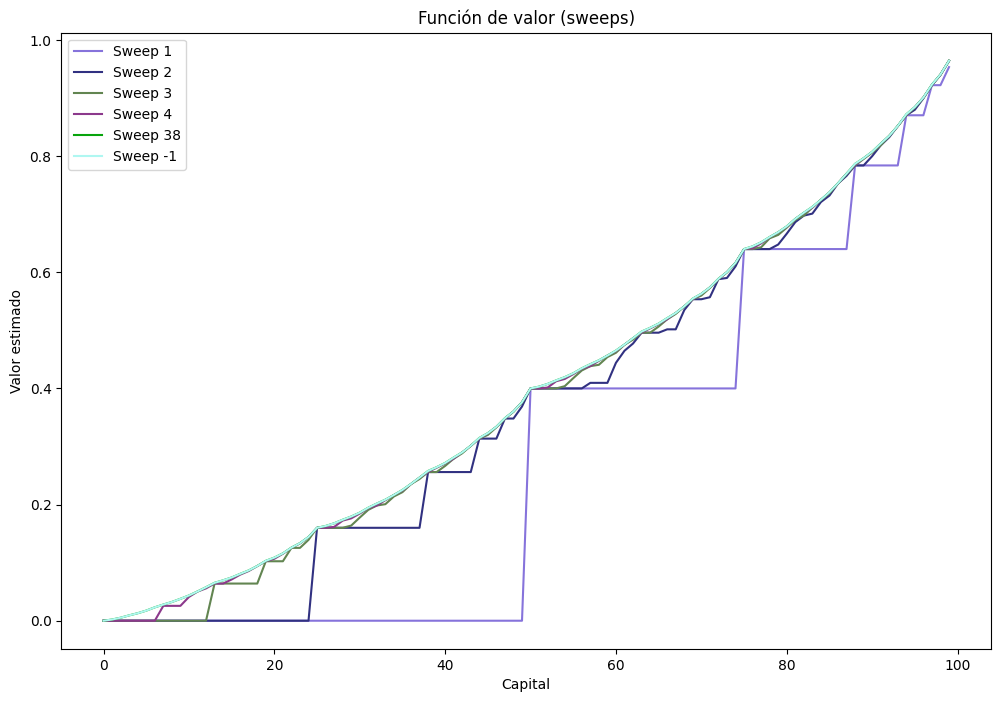

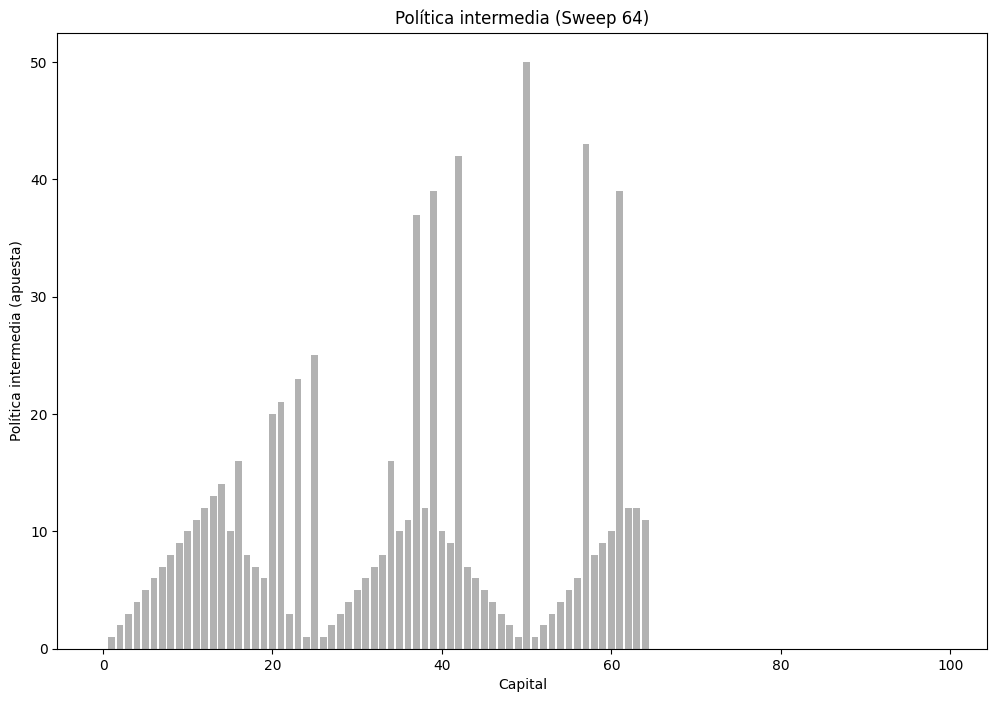

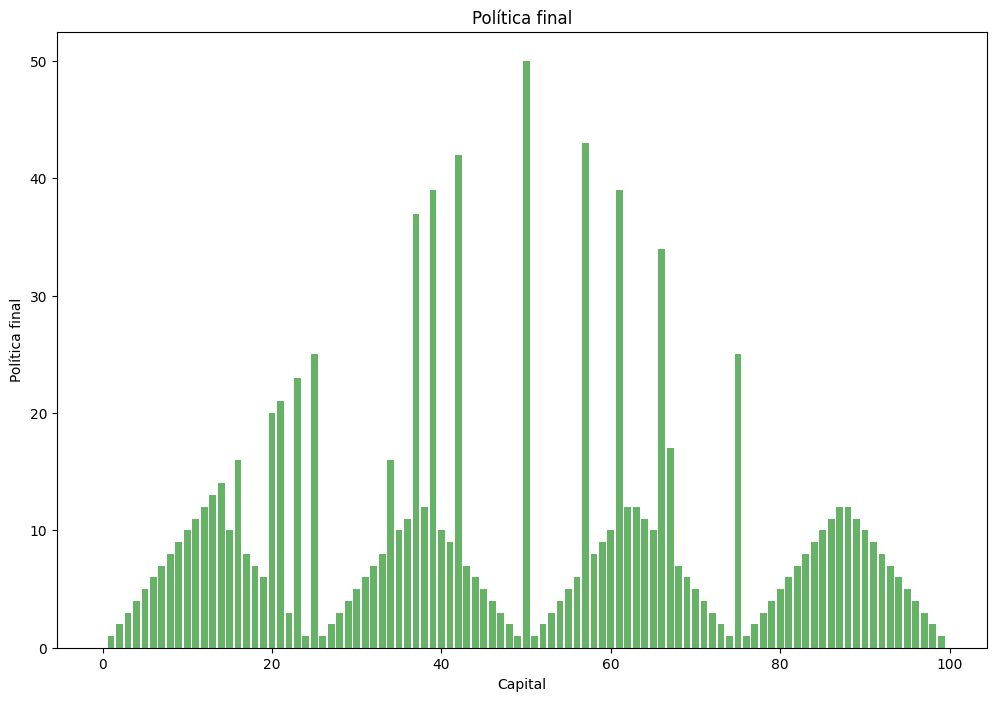

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parámetros
p_h = 0.4  # Probabilidad de que la moneda caiga en "cara"
gamma = 1  # Tasa de descuento (=1) porque este problema trata tareas episódicas
recompensas = np.zeros(101, dtype=np.longdouble)  # recompensas para cada estado incluyendo el 100
recompensas[100] = 1  # recompensa en el estado objetivo

class ValueIteration:
    def __init__(self):
        self.valor_estado = np.zeros(101, dtype=np.longdouble)  # valores de estado
        self.politica = np.zeros(100, dtype=np.longdouble)  # política para cada estado
        self.theta = 1e-50
        self.valor_estados_sweeps = []  # Almacena los valores de estado después de cada barrido importante
        self.politicas_sweeps = []  # Almacena las políticas después de cada barrido

    def ecuacion_bellman(self, estado, accion, valor_estado):
        estado_ganancia = estado + accion
        estado_perdida = estado - accion
        valor_ganancia = p_h * (recompensas[estado_ganancia] + gamma * valor_estado[estado_ganancia])
        valor_perdida = (1 - p_h) * (recompensas[estado_perdida] + gamma * valor_estado[estado_perdida])
        return valor_ganancia + valor_perdida

    def iteracion_valor(self):
        while True:
            delta = 0
            for estado in range(1, 100):
                v = self.valor_estado[estado]
                max_accion = min(estado, 100 - estado)
                valores_accion = np.zeros(max_accion + 1, dtype=np.longdouble)
                for accion in range(1, max_accion + 1):
                    valores_accion[accion] = self.ecuacion_bellman(estado, accion, self.valor_estado)
                nuevo_valor = np.max(valores_accion)
                delta = max(delta, np.abs(nuevo_valor - self.valor_estado[estado]))
                self.valor_estado[estado] = nuevo_valor
            self.valor_estados_sweeps.append(self.valor_estado.copy())  # Guardar la función de valor después de este barrido
            if delta < self.theta:
                break
        self.determinar_politica()
        return self.valor_estado

    def determinar_politica(self):
        for estado in range(1, 100):
            max_accion = min(estado, 100 - estado)
            valores_accion = np.zeros(max_accion + 1, dtype=np.longdouble)
            for accion in range(1, max_accion + 1):
                valores_accion[accion] = self.ecuacion_bellman(estado, accion, self.valor_estado)
            mejor_accion = np.argmax(valores_accion)
            self.politica[estado] = mejor_accion
            self.politicas_sweeps.append(self.politica.copy())  # Guardar la política después de cada actualización
        return self.politica

# Crear una instancia de ValueIteration y ejecutar la iteración de valor
estimador_vi = ValueIteration()
valores = estimador_vi.iteracion_valor()  # Actualiza la función de valor hasta que converge

# Gráficas de la función de valor a lo largo de los sweeps seleccionados
plt.figure(figsize=(12, 8))
sweeps_to_plot = [1, 2, 3] + random.sample(range(4, len(estimador_vi.valor_estados_sweeps)), 2) + [-1]
for i in sweeps_to_plot:
    plt.plot(range(100), estimador_vi.valor_estados_sweeps[i-1][:100], label=f'Sweep {i}',
             color=np.random.rand(3,))
plt.xlabel('Capital')
plt.ylabel('Valor estimado')
plt.title('Función de valor (sweeps)')
plt.legend()
plt.show()

# Gráfica de una política intermedia
indice_politica_intermedia = random.randint(0, len(estimador_vi.politicas_sweeps) - 2)
plt.figure(figsize=(12, 8))
plt.bar(range(100), estimador_vi.politicas_sweeps[indice_politica_intermedia], alpha=0.6, color='gray')
plt.xlabel('Capital')
plt.ylabel('Política intermedia')
plt.title(f'Política intermedia (Sweep {indice_politica_intermedia + 1})')
plt.show()

# Gráfica de la política final
plt.figure(figsize=(12, 8))
plt.bar(range(100), estimador_vi.politica, alpha=0.6, color='green')
plt.xlabel('Capital')
plt.ylabel('Política final')
plt.title('Política final')
plt.show()